Welcome to the World of Quant!

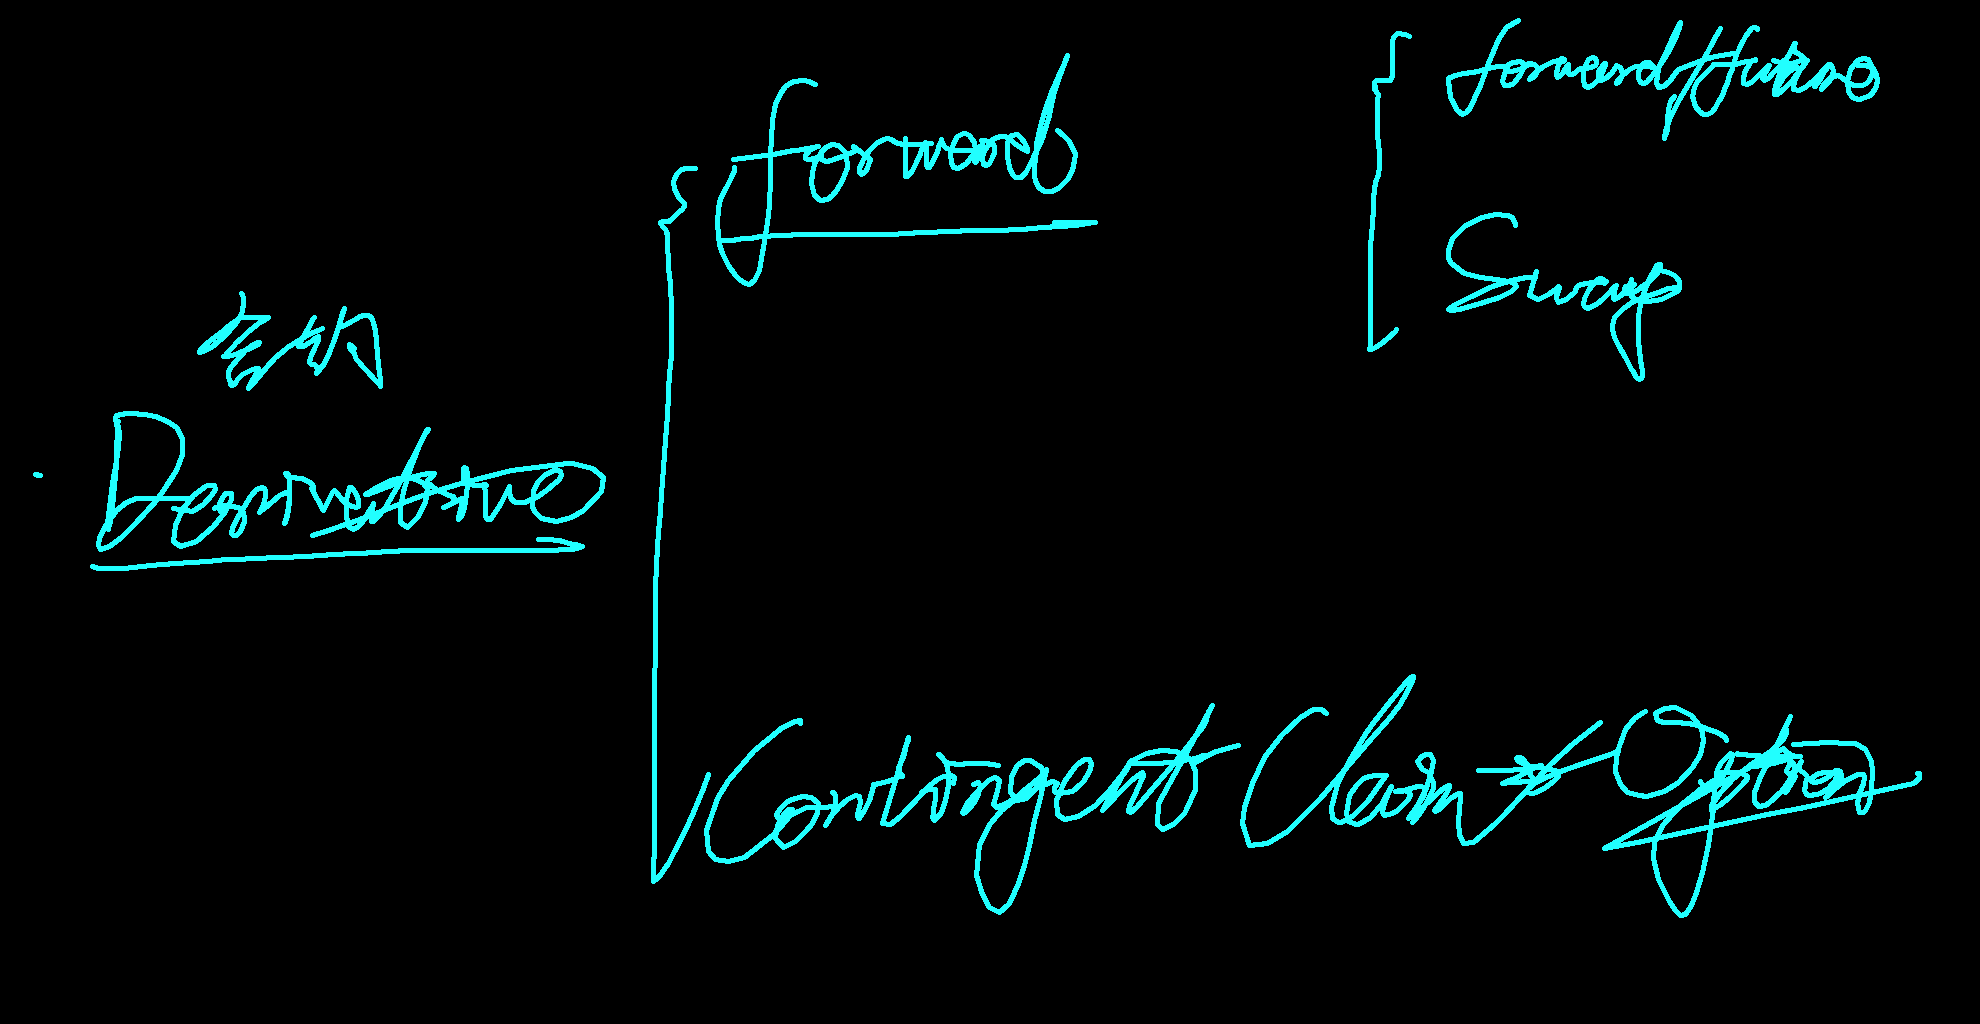

1.Forward Contract(OTC)
2.Future Contract(Standardized & exchange-traded)
3.Swap(A Series of Forward Contract)
4.Option Contract(Right)

1.Principle : No-Arbitrage Principle

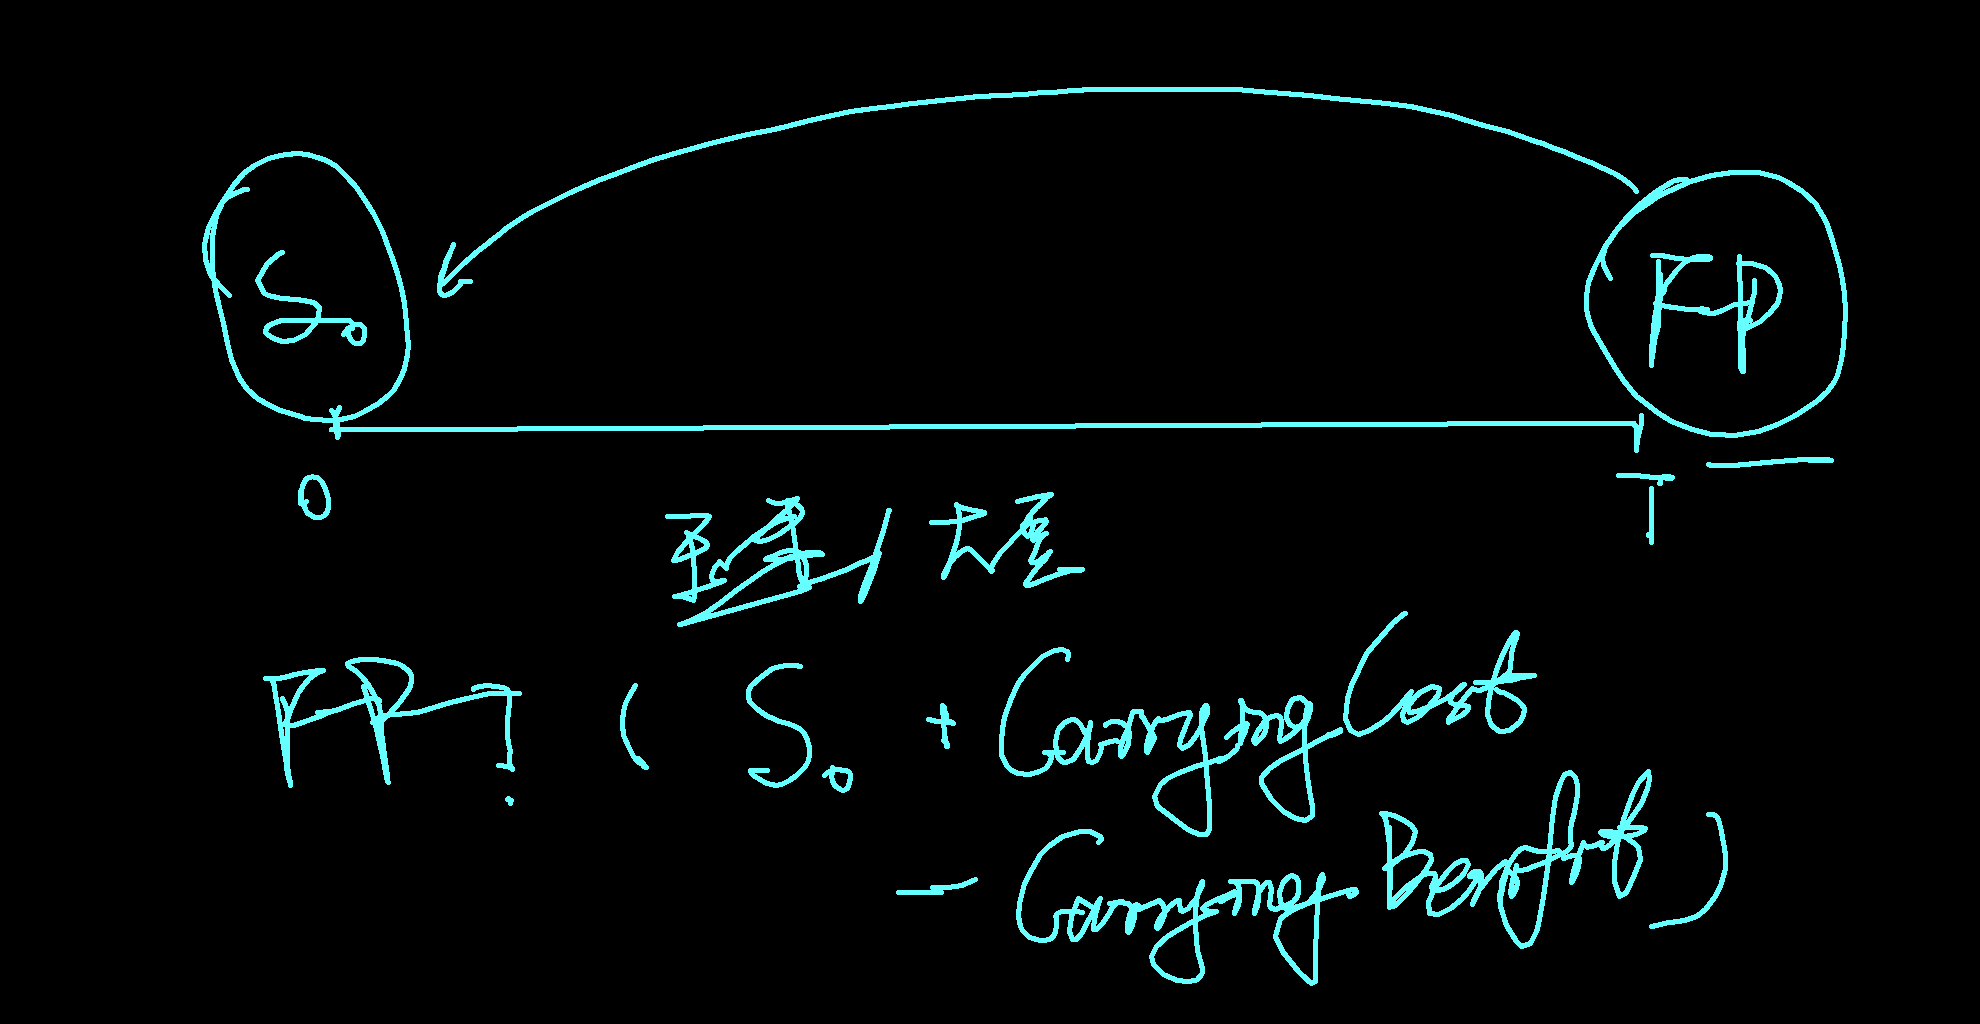

Cash-and-Carry Arbitrage: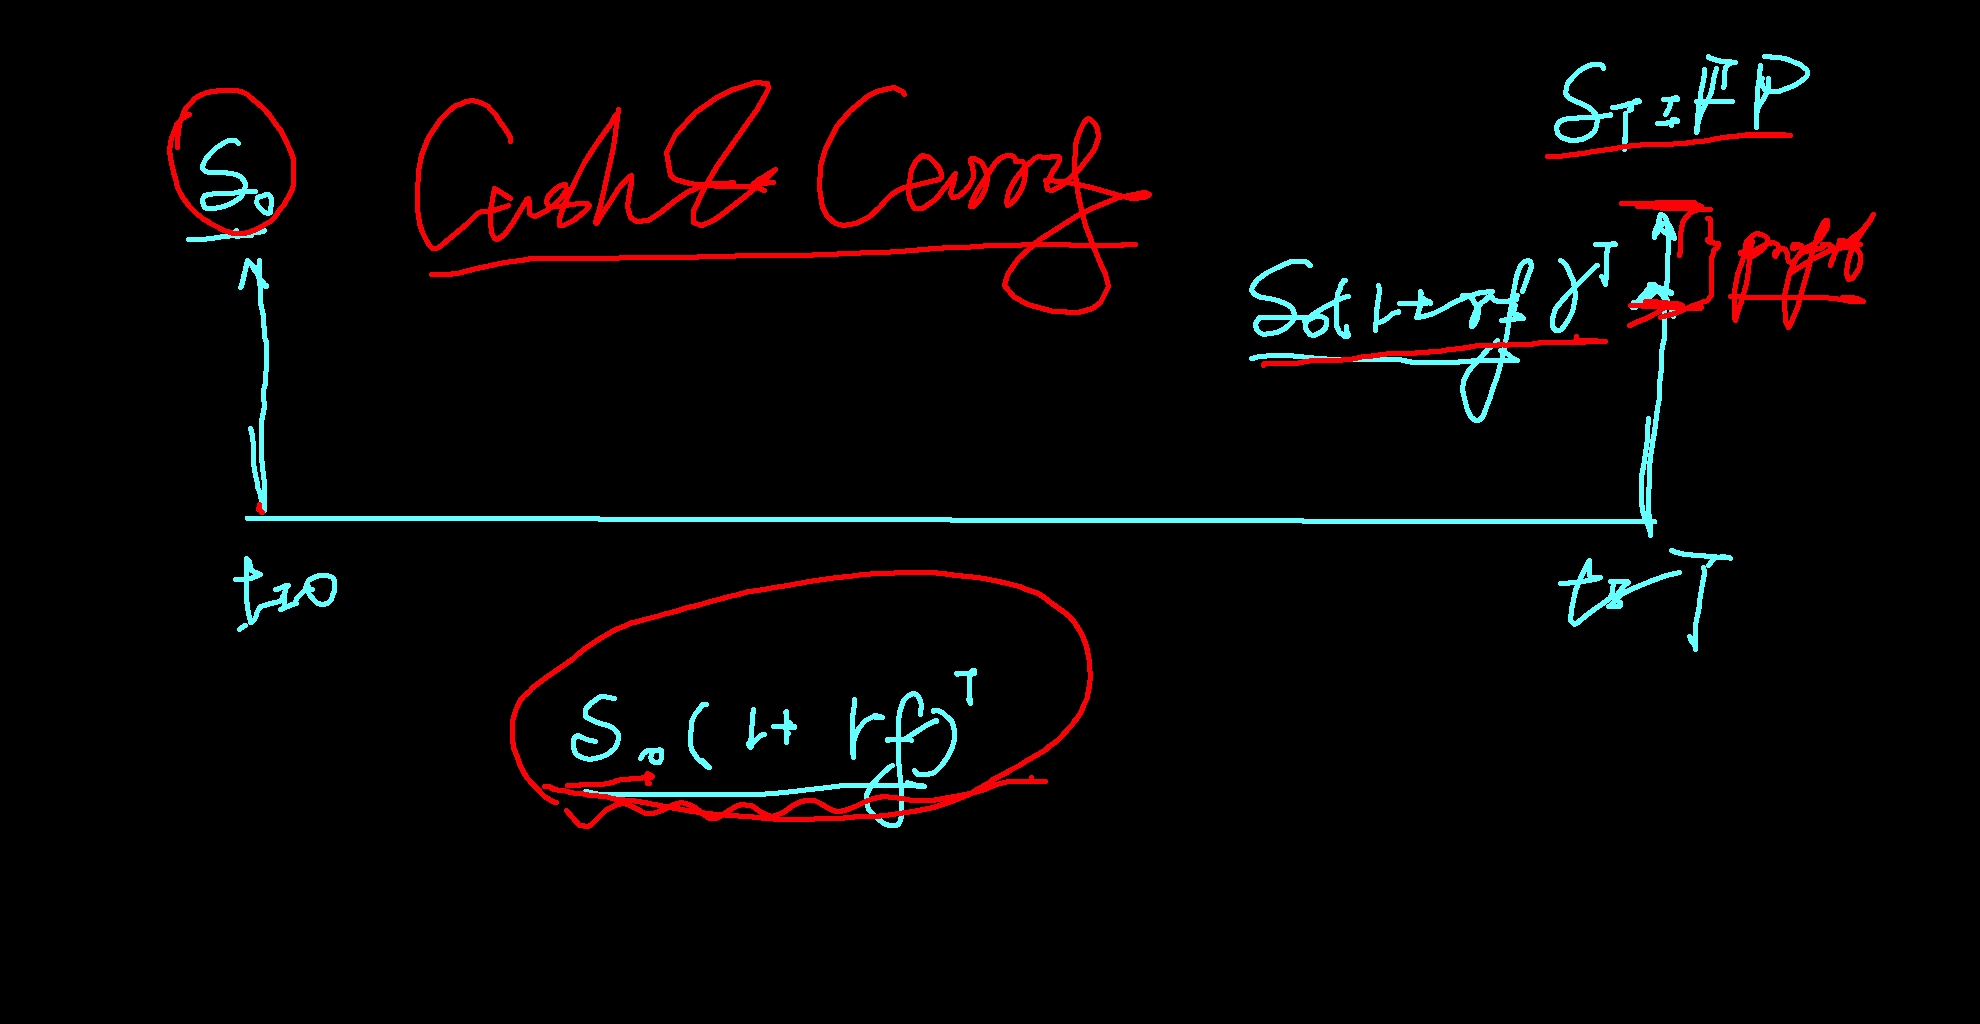

Cash & Carry Arbitrage:
1.Borrow S0 at risk-free rate
2.Buy underling assets
3.Short a forward contract

Reverse Cash & Carry Arbitrage:
1.Short a forward contract to get S0
2.Invest S0 at risk-free rate
3.long a forward contract

In [3]:
from datetime import datetime

def days_between_to_years(d1,d2):
    d1=datetime.strptime(d1,"%Y-%m-%d")
    d2=datetime.strptime(d2,"%Y-%m-%d")
    return abs((d2-d1).days/365)
days_between_to_years("2019-12-20","2019-05-09")

0.6164383561643836

In [4]:
def calculate_cash_and_carry_profit(S0,FP,Rf,T):
    Profit=FP-S0*(1+Rf)**T
    return Profit
calculate_cash_and_carry_profit(3599.70,4090.0,0.03426,days_between_to_years("2019-12-20","2019-05-09"))

414.76906030781356

In [5]:
def calculate_actual_rate_under_no_arbitrage(S0,FP,T):
    actual_rate=pow((FP/S0),1/T)-1
    return actual_rate
calculate_actual_rate_under_no_arbitrage(3599.70,4090.0,days_between_to_years("2019-12-20","2019-05-09"))

0.23016559811399517

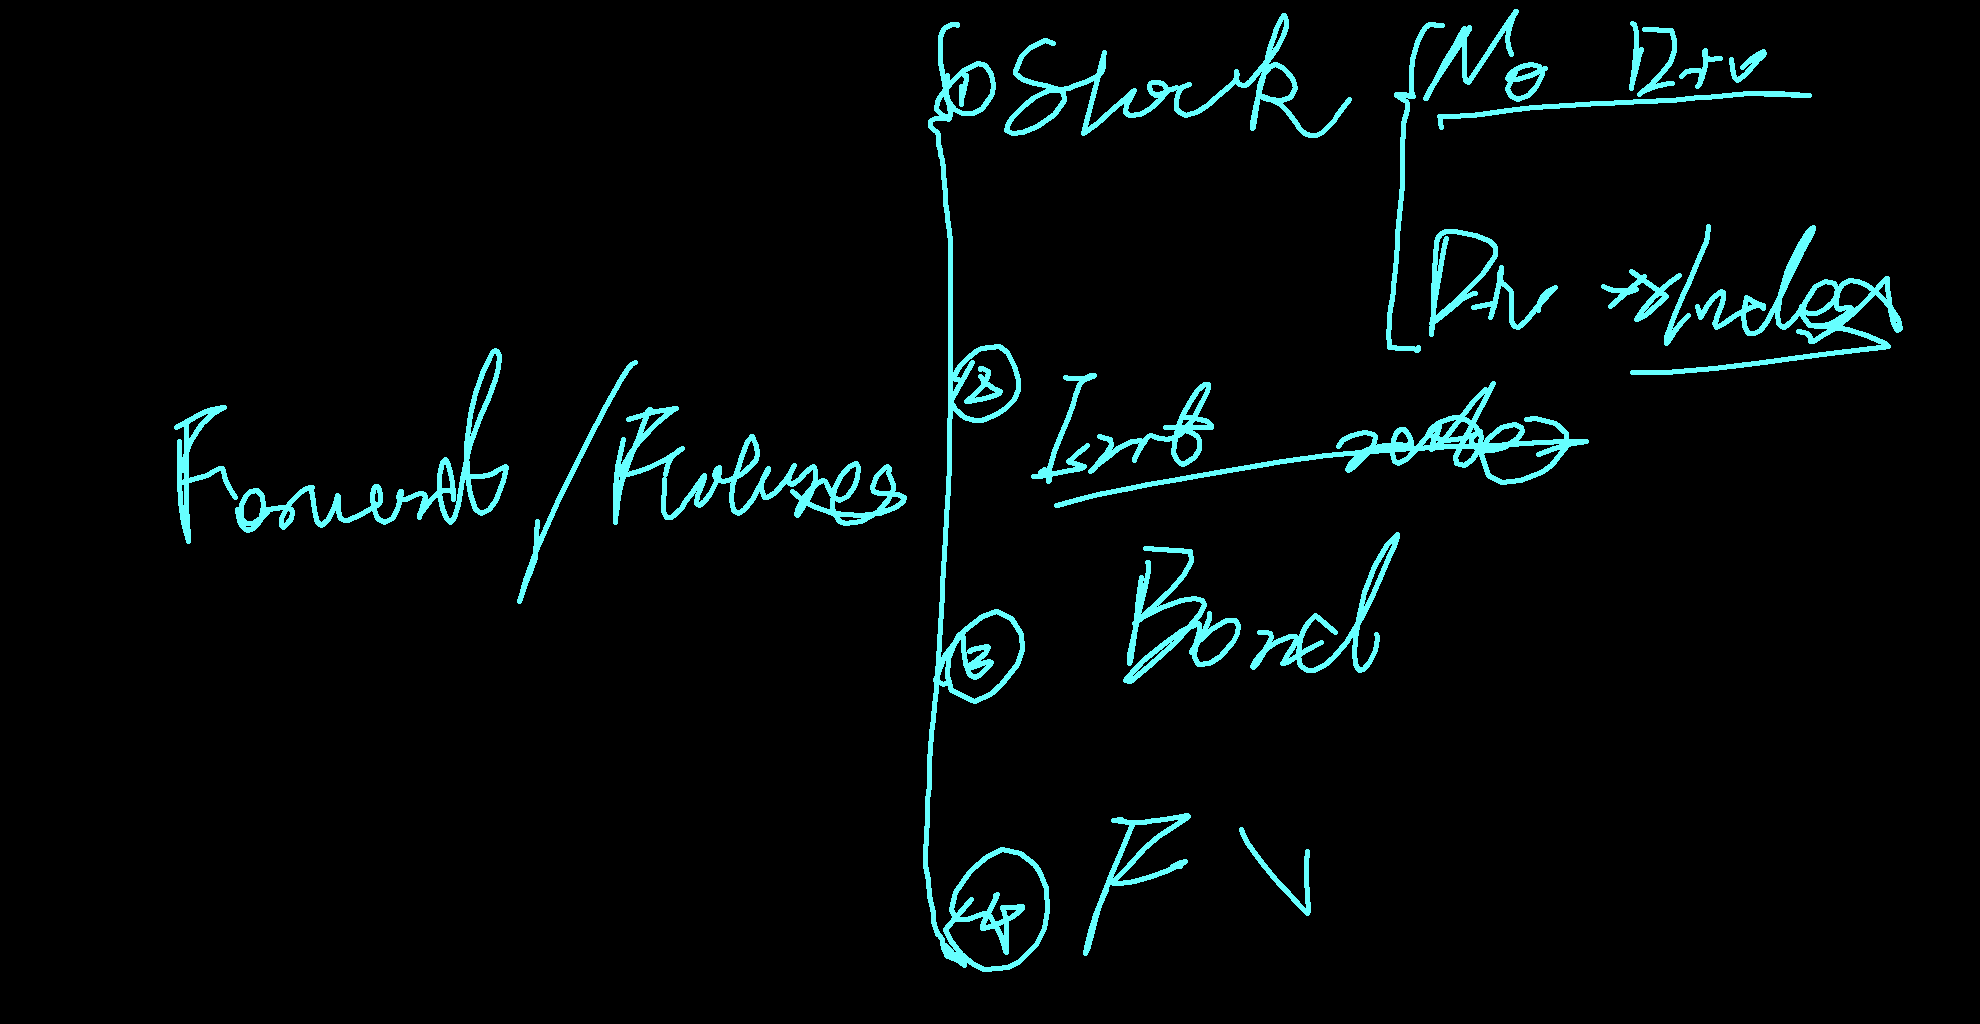

Forward Value with no Div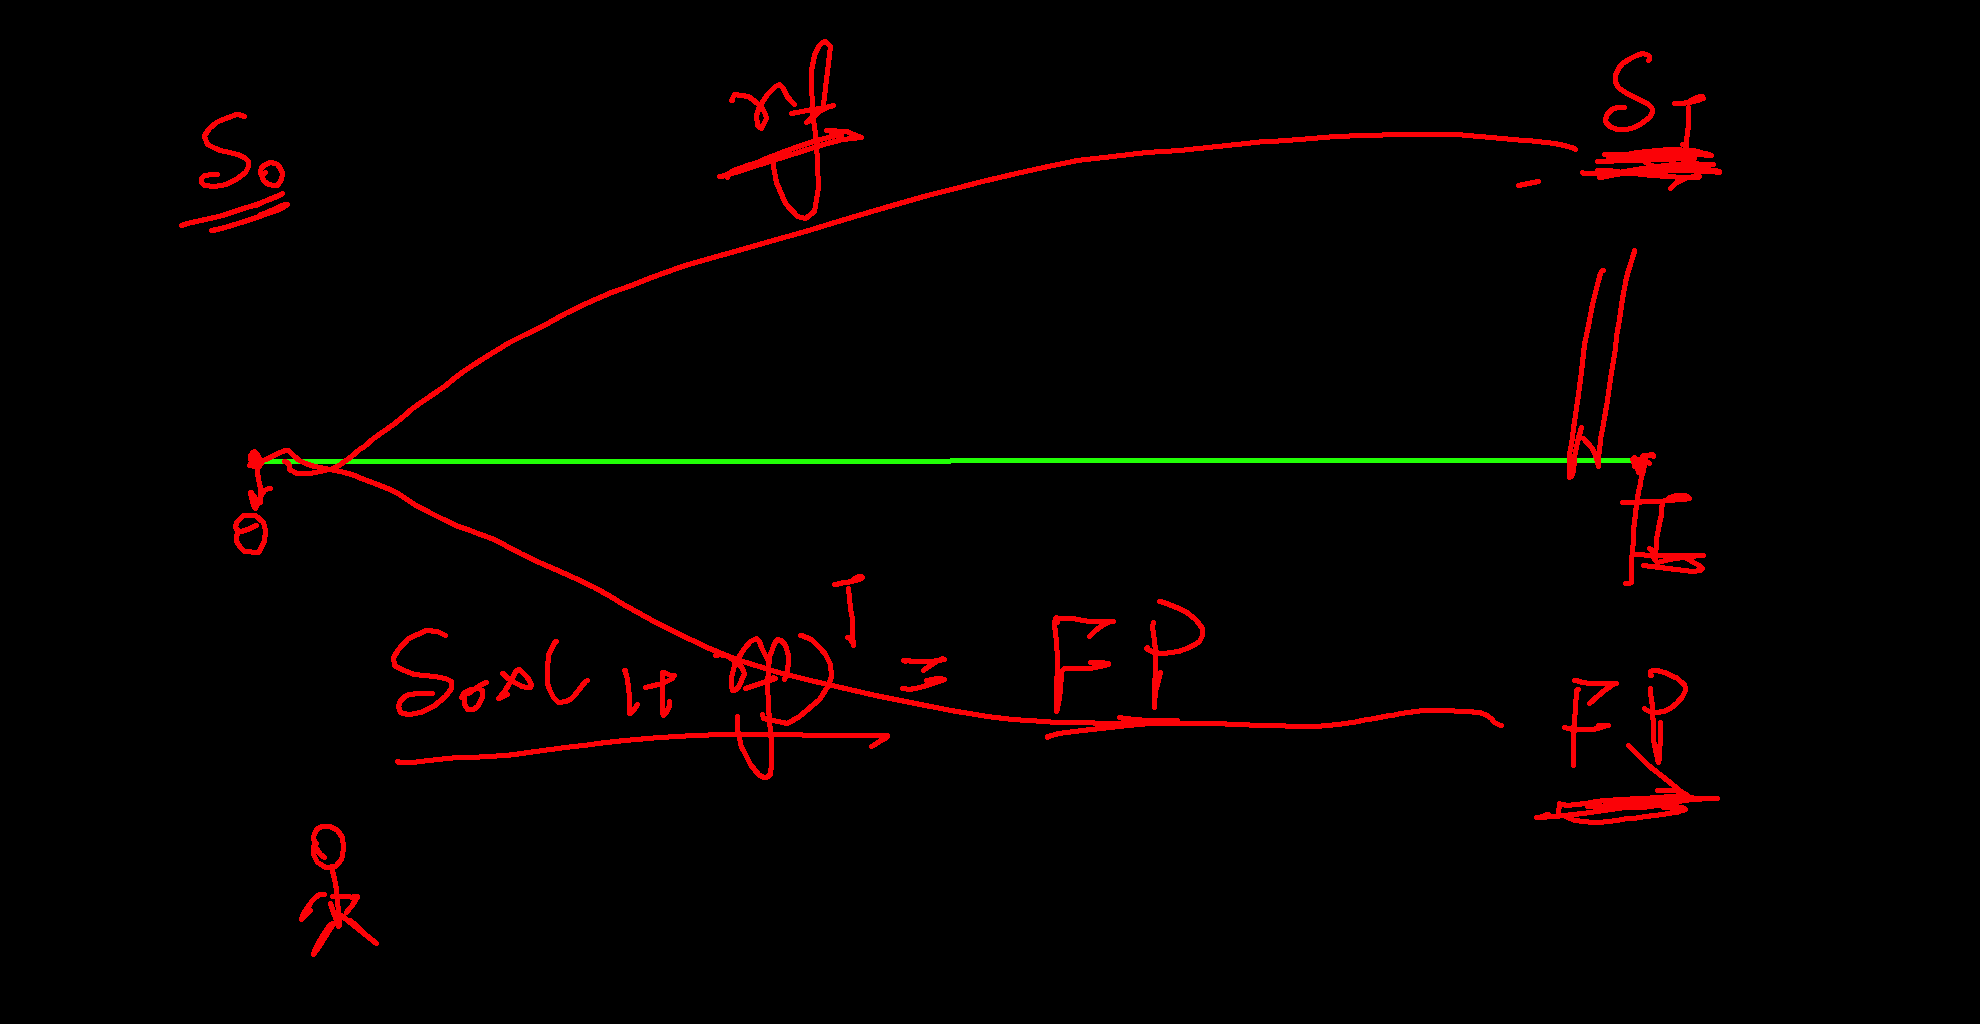

Forward Value with no Div:
0:
$S_0=\frac{FP}{(1+R_f)^{T}}$

t:
value:$V=S_t-\frac{FP}{(1+R_f)^{T-t}}$

William Inc. 0时刻签署了一份远期合约，T=1年的以120块购买一股William Inc. t=0.25 William Inc. 116元，6% 你手中持有的William Inc远期合约值多少钱？

In [12]:
def calculate_forward_value_with_no_div(St,FP,Rf,T,t):
    value=St-FP/(1+Rf)**(T-t)
    return value
calculate_forward_value_with_no_div(120,130,0.20,1,0.75)

-4.20756298656768

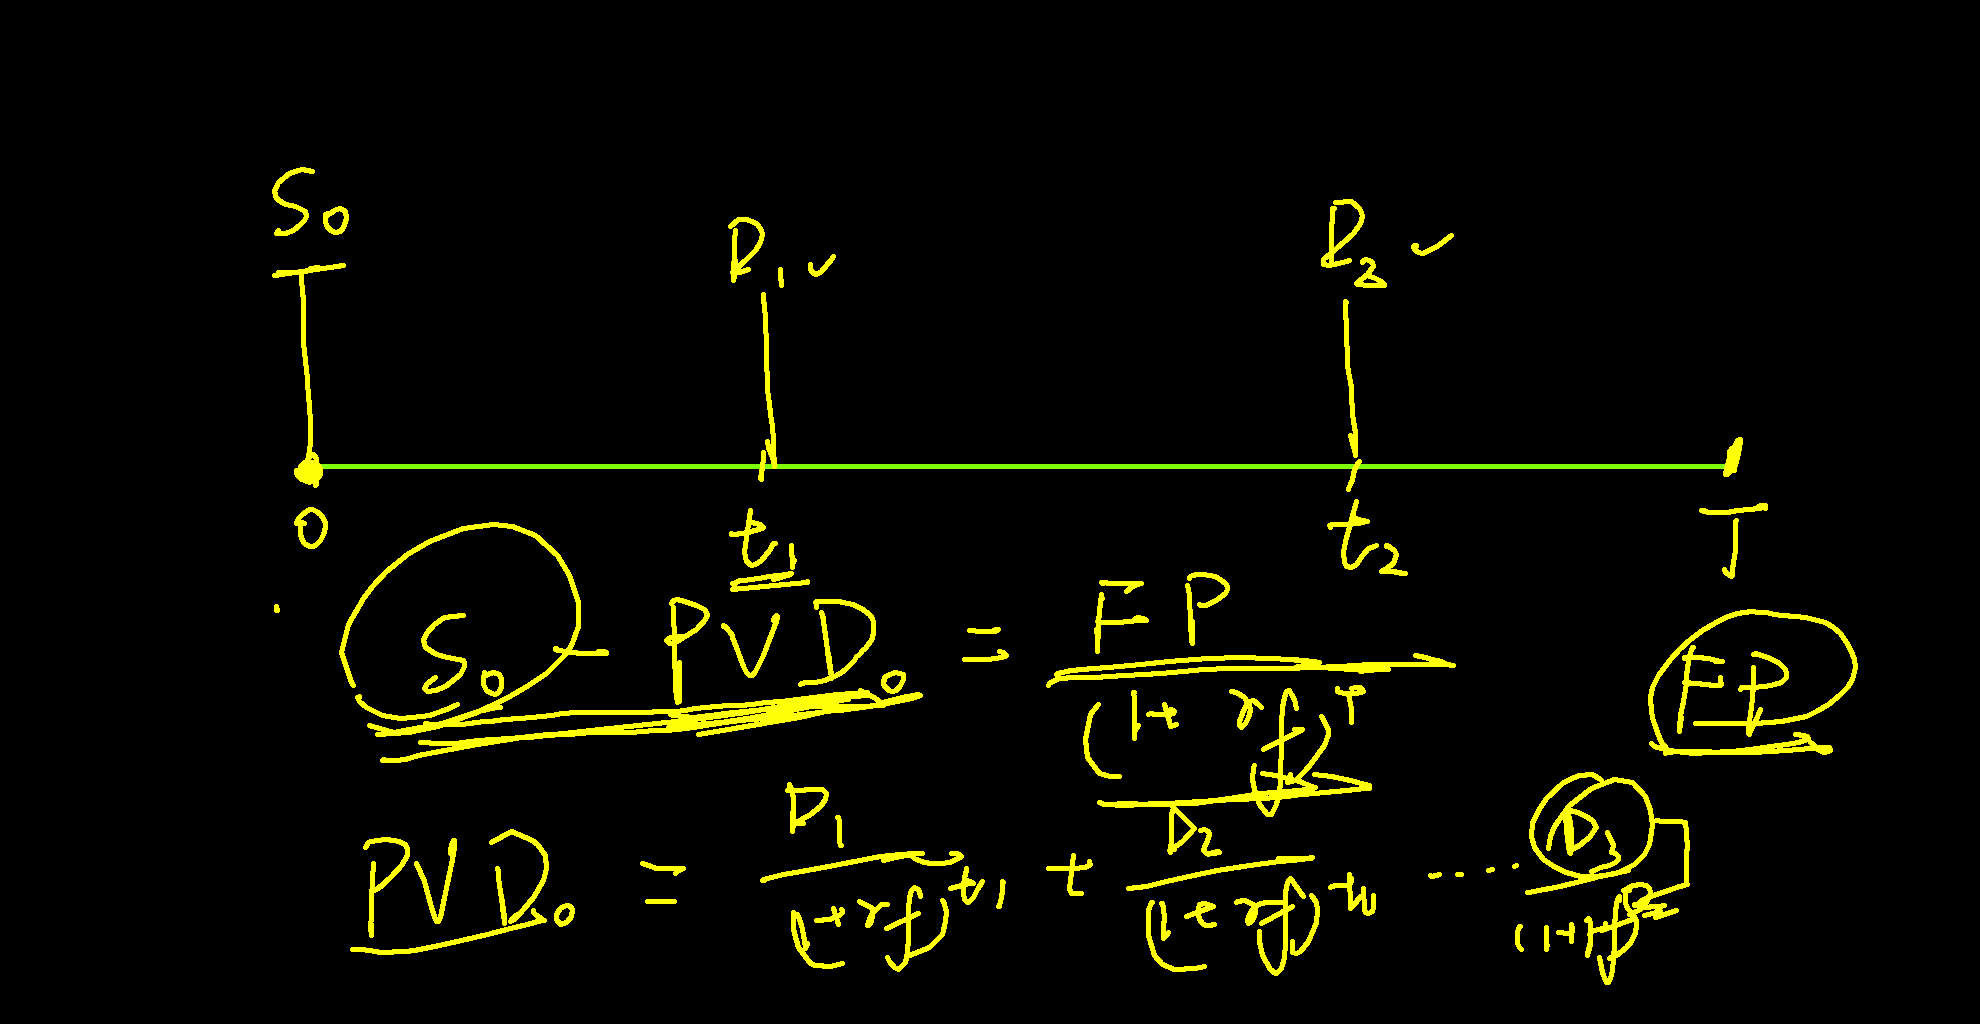

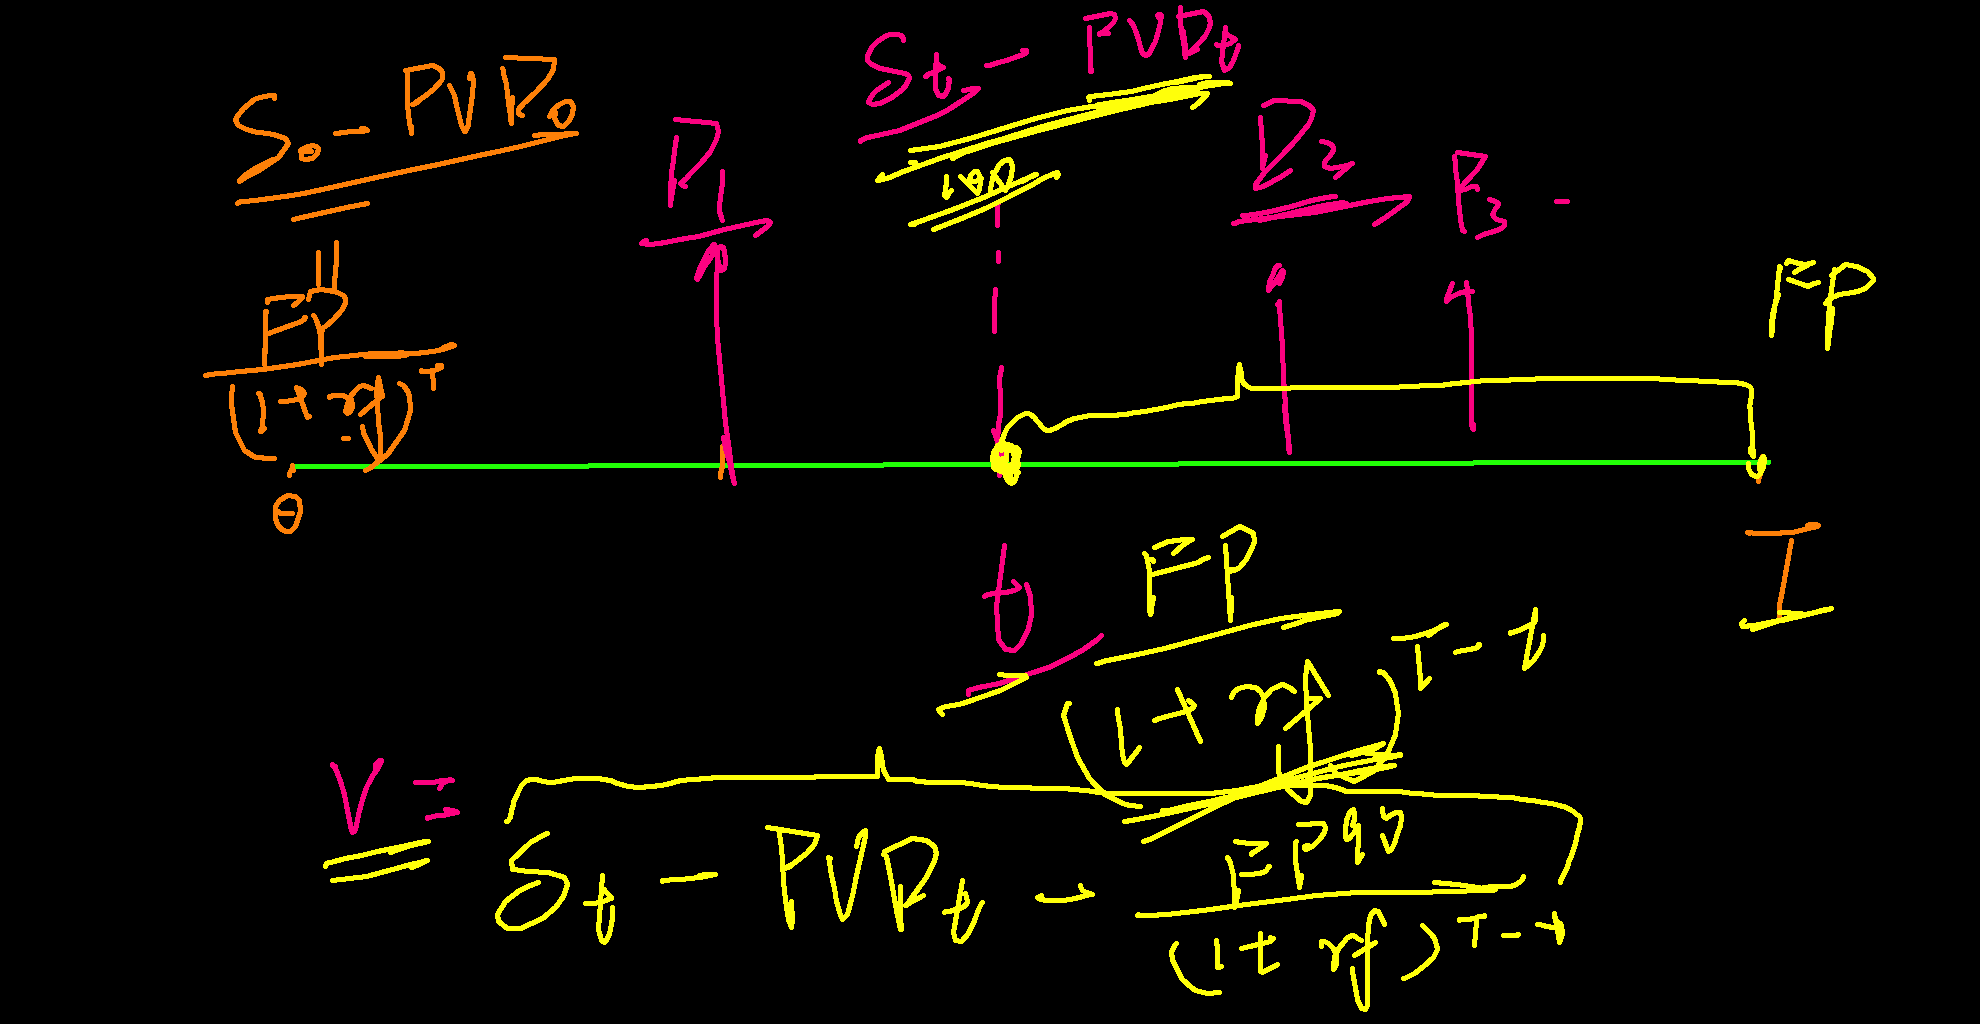

Forward Value with Div:
0:
$S_0-PVD_0=\frac{FP}{(1+R_f)^{T}}$

t:
value:$V=S_t-PVD_t-\frac{FP}{(1+R_f)^{T-t}}$

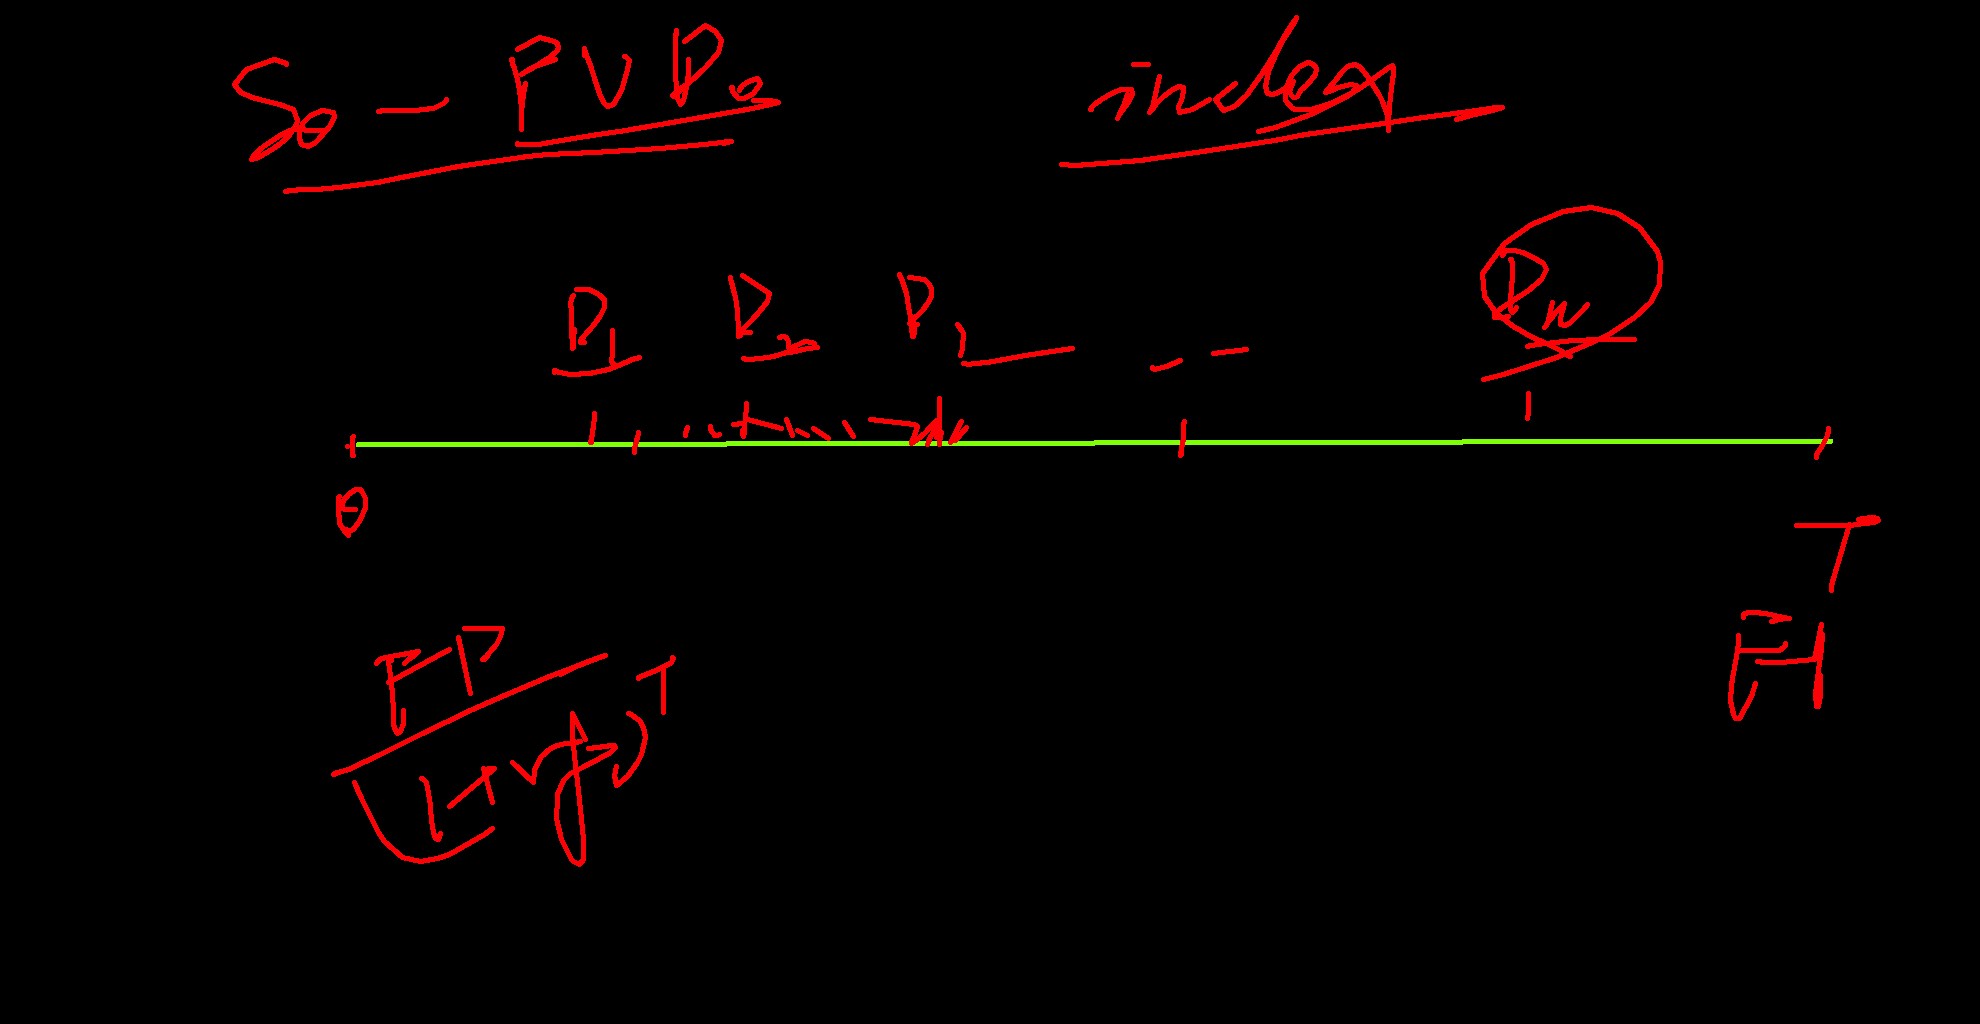

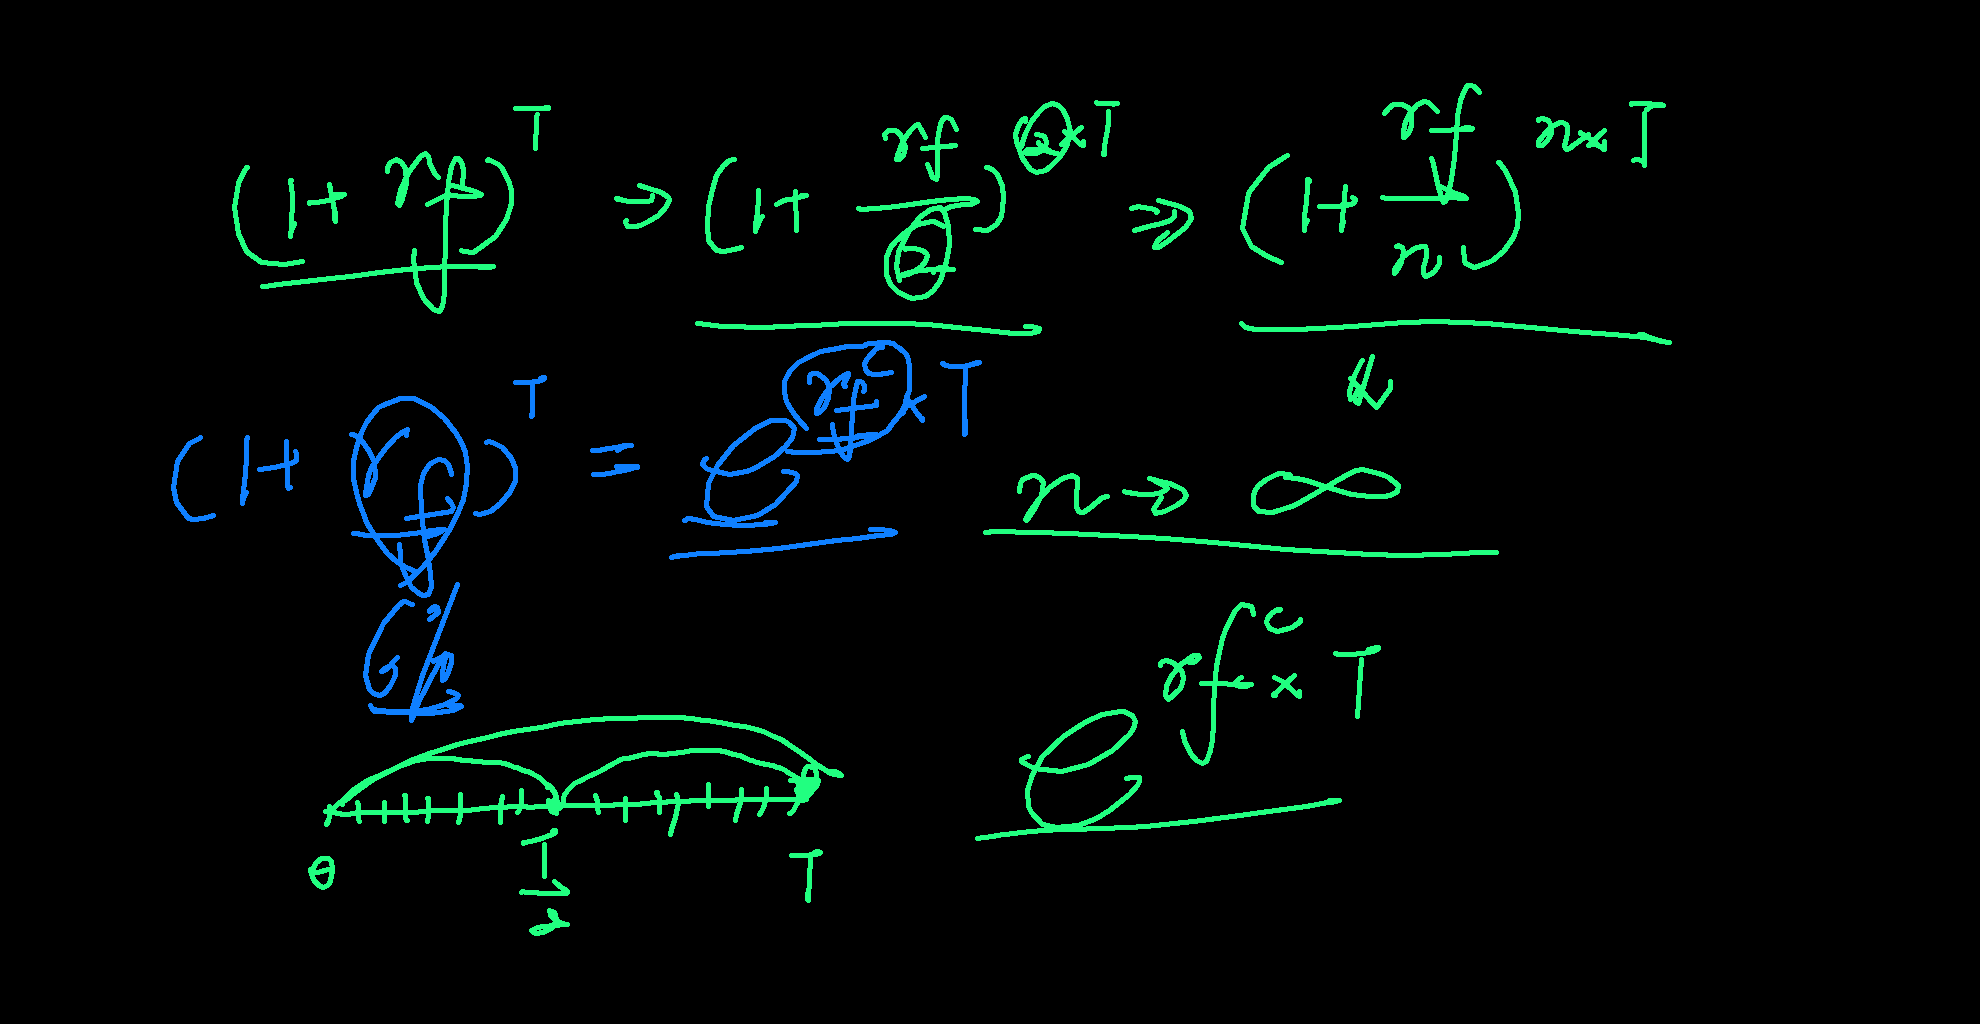

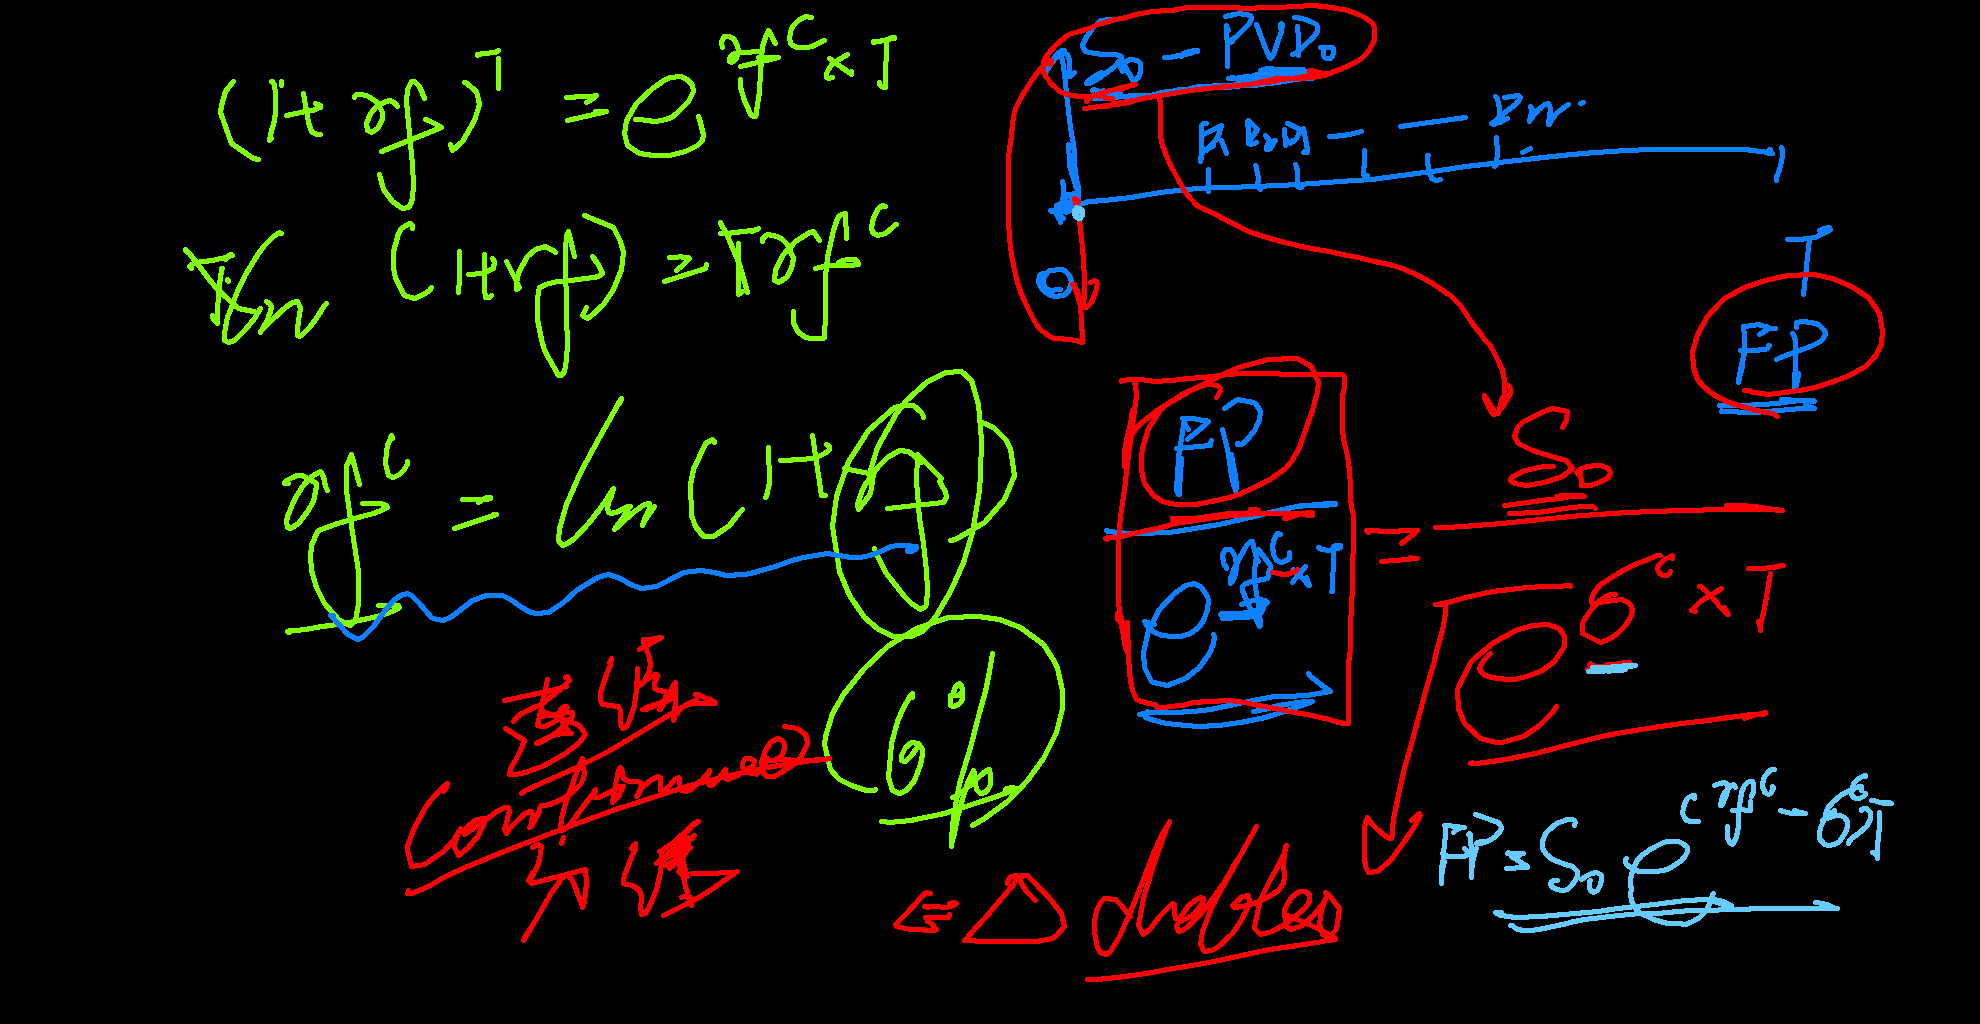

In [16]:
import numpy as np

def change_rate_to_continuous_compounded_rate(rate):
    rate_c=np.log(1+rate)
    return rate_c

change_rate_to_continuous_compounded_rate(0.10)

0.09531017980432493

price:
$FP=S0\times e^{rf^{c}-\delta ^{c}} $

Value at time t $ V_{long}=(\frac{S_t}{e^{\delta ^{c} \times (T-t)}})-(\frac{FP}{e^{R_f^{c}\times (T-t)}})$

Divident Pay Out ratio: (股利支付率):$ \frac{Divident}{NI} $
Divident Yield Ratio（股息率）:$ \frac{D}{P0}$

In [19]:
Rc=change_rate_to_continuous_compounded_rate(0.033264)
delta_c=change_rate_to_continuous_compounded_rate(0.0198)

In [22]:
def calculate_the_price_of_the_asset(S0,Rc,delta_c,T):
    t=T/12
    price=S0 * np.exp(Rc-delta_c)
    return price
calculate_the_price_of_the_asset(3000,Rc,delta_c,3)

3039.6077662286716

Libor:

London Interbank Offered Rate:

1.360-day a year,30 days a month
2.add - on rate 100*(1+Libor)
3.US- dollar /Eurodollar loan
4.Shibor

Lender (short FRA) fix rate receiver: receive fixed rate,pay floating rate
Borrower(long FRA) floating rate receiver :receive floating rate , pay  fixed rate

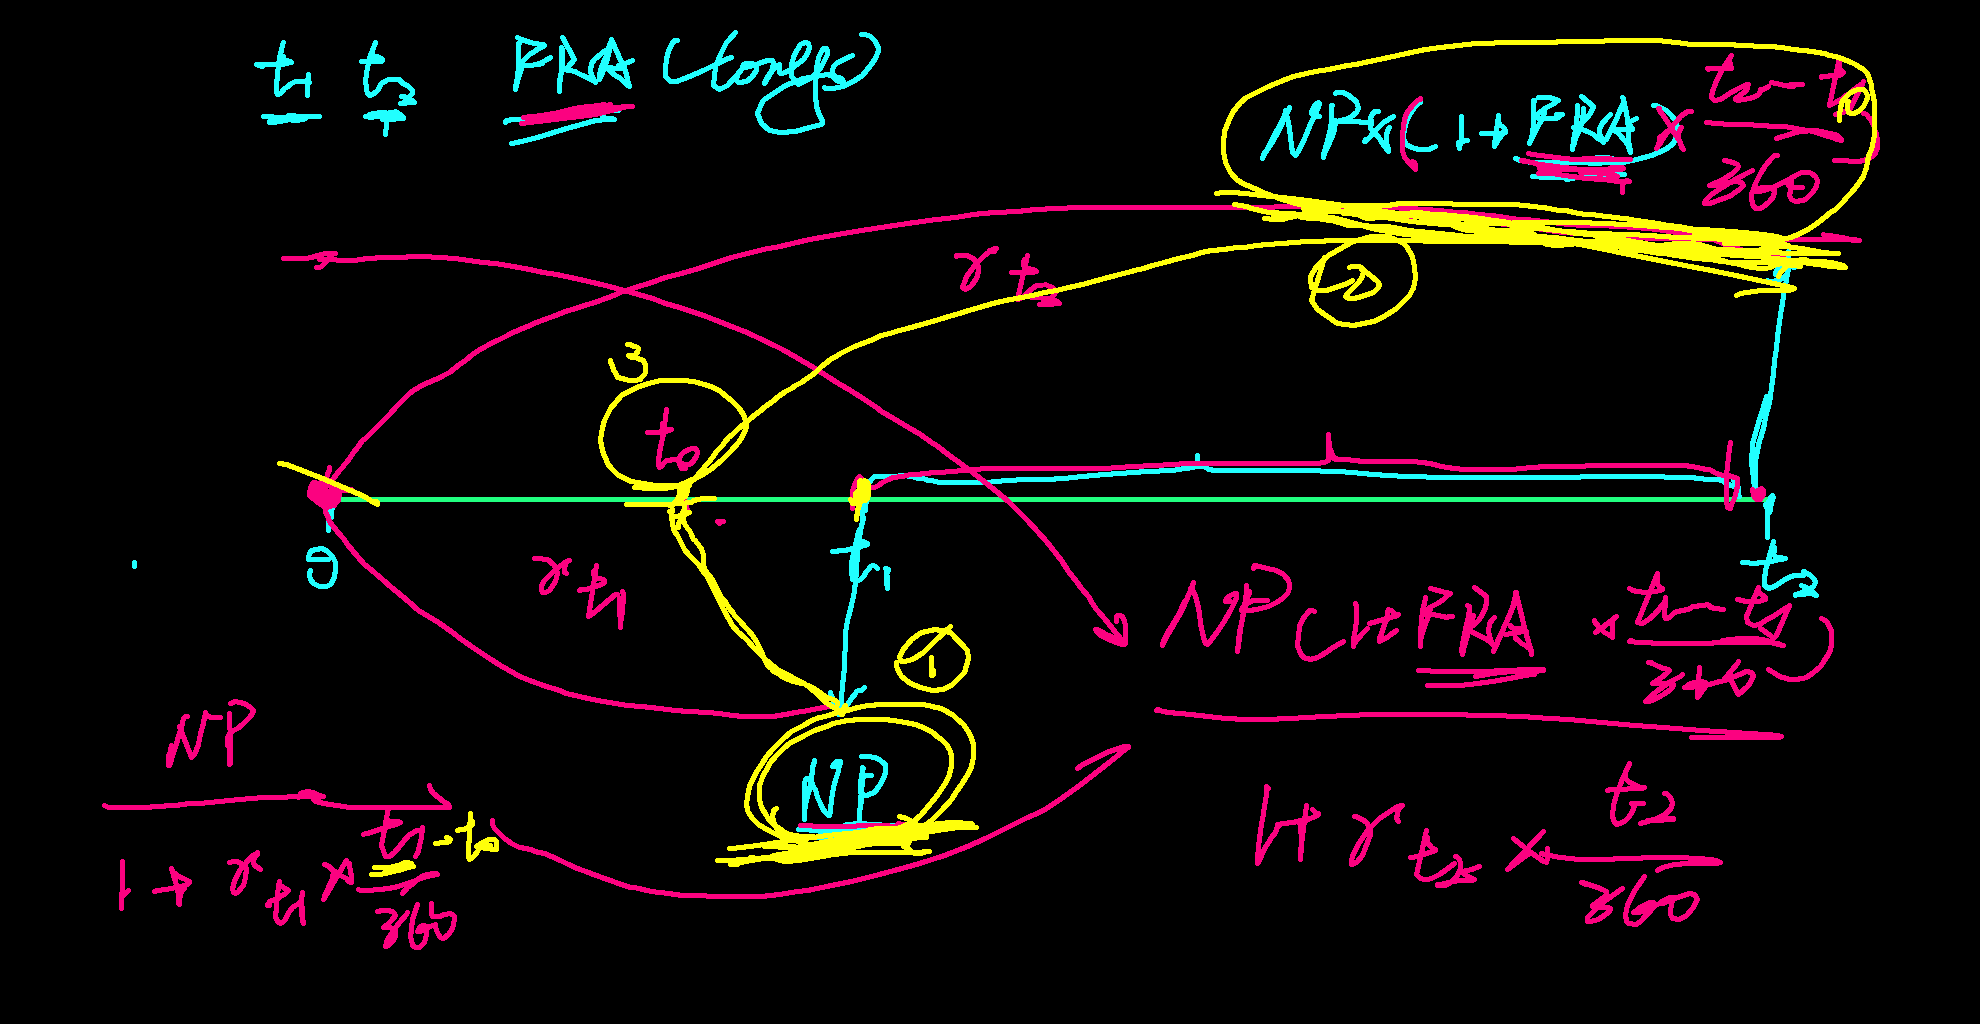

long 6*9 FRA (receice float) 0.75%
T=0 notional amount 1,000,000  6-month spot rate 0.625%  9-month Libor 0.725%
T=3  3-month libor 1.35% , 6-month Libor 1.45% 

In [5]:
def calculate_FRA_value(NP,FRA,t0,t1,t2,r1_0,r2_0):
    value=NP/(1+r1_0*(t1-t0)/12)
    price=(NP*(1+FRA*(t2-t1)/12))/(1+r2_0*(t2-t0)/12)
    FRA_value=value-price
    return FRA_value
calculate_FRA_value(1000000,0.0075,3,6,9,0.0135,0.0145)

1972.664050836349